<a href="https://colab.research.google.com/github/weihan444/ML-Hackathon/blob/PW-testing/ML_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import required libraries

In [92]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample



pd.set_option("display.max_columns",None)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Data Preprocessing

# Feature Engineering
Selecting data


So we can see the data is highly imbalanced, we should perform oversampling

In [105]:

# check version number
import imblearn
print(imblearn.__version__)


0.8.1


Class=5, n=1 (0.315%)
Class=0, n=182 (57.413%)
Class=1, n=83 (26.183%)
Class=2, n=30 (9.464%)
Class=3, n=17 (5.363%)
Class=4, n=4 (1.262%)


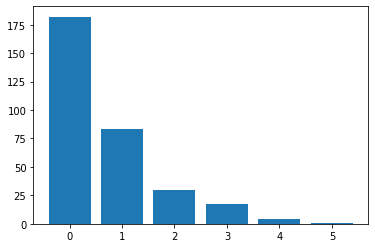

In [106]:
# load and summarize the dataset
from collections import Counter
from sklearn.preprocessing import LabelEncoder
# define the dataset location
url = 'https://raw.githubusercontent.com/weihan444/ML-Hackathon/main/ML%20Dataset.csv'
# load the csv file as a data frame
df = read_csv(url, header=None)
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


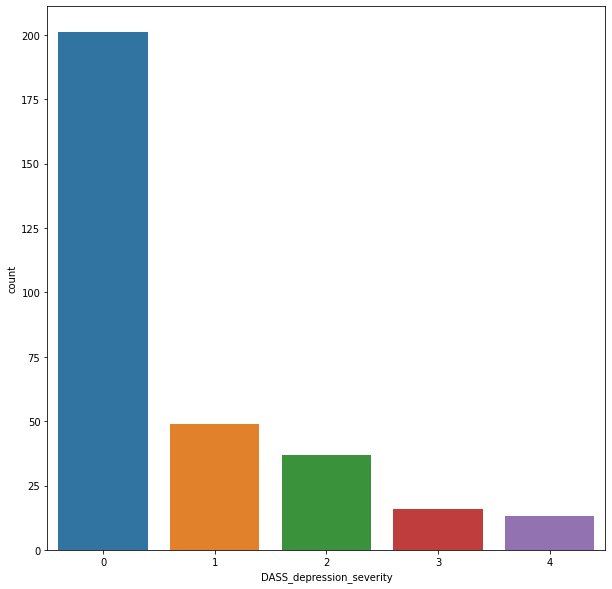

Class=0, n=201 (20.000%)
Class=2, n=201 (20.000%)
Class=1, n=201 (20.000%)
Class=3, n=201 (20.000%)
Class=4, n=201 (20.000%)


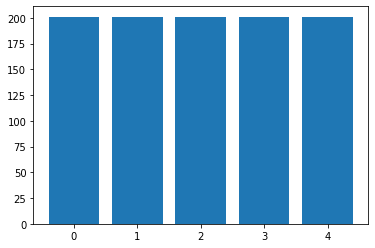

In [107]:
# example of oversampling a multi-class classification dataset
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# define the dataset location
url = 'https://raw.githubusercontent.com/weihan444/ML-Hackathon/main/ML%20Dataset.csv'
# load the csv file as a data frame
#df = read_csv(url)
#to keep it in pandas just keep this line 
df = pd.read_csv(url, header=0)

selected_data = df[["Age_Numerical", "Gender", "Routine_loss", "Class_hours", "Medical_illness", "Mental_illness", "COVID_symptoms", "Quarantine", "DASS_depression_severity","Marital","Marital_problems","Religion_binary","Religion_help","Med_or_not","Expenses","Monthly_expenses","Living_with1","Living_with","Worry_family","Stress_class_disrupted","Residence_high_COVID1","Residence_high_COVID"]]
X = selected_data.drop(['DASS_depression_severity'], axis=1)
y = selected_data['DASS_depression_severity']

plt.figure(figsize=(10,10))
sns.countplot(y)
plt.show()
# label encode the target variable exp 3 string but assign it as 1,2,3 
#y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()
y = keras.utils.to_categorical(y)

Split into train and test

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=80)

# Feature Scaling
Standardize Data

In [109]:
stand = StandardScaler().fit(X_train)

X_train_stand = stand.transform(X_train)
X_test_stand = stand.transform(X_test)

print(X_train_stand.shape)
print(X_test_stand.shape)

print(y_train.shape)
print(y_test.shape)


(753, 21)
(252, 21)
(753, 5)
(252, 5)


# Model Training


In [110]:
model = keras.Sequential()
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(
    X_train_stand, y_train,
    epochs=12
    )

Epoch 1/12
24/24 [==============================] - 0s 1ms/step - loss: 1.6683 - accuracy: 0.2444
Epoch 2/12
24/24 [==============================] - 0s 1ms/step - loss: 1.4581 - accuracy: 0.3918
Epoch 3/12
24/24 [==============================] - 0s 1ms/step - loss: 1.3303 - accuracy: 0.4768
Epoch 4/12
24/24 [==============================] - 0s 1ms/step - loss: 1.2420 - accuracy: 0.5365
Epoch 5/12
24/24 [==============================] - 0s 1ms/step - loss: 1.1721 - accuracy: 0.5724
Epoch 6/12
24/24 [==============================] - 0s 1ms/step - loss: 1.1125 - accuracy: 0.6003
Epoch 7/12
24/24 [==============================] - 0s 1ms/step - loss: 1.0646 - accuracy: 0.6189
Epoch 8/12
24/24 [==============================] - 0s 1ms/step - loss: 1.0202 - accuracy: 0.6308
Epoch 9/12
24/24 [==============================] - 0s 1ms/step - loss: 0.9809 - accuracy: 0.6521
Epoch 10/12
24/24 [==============================] - 0s 1ms/step - loss: 0.9470 - accuracy: 0.6627
Epoch 11/12
24/24 [